In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy.stats import mannwhitneyu, binomtest
import warnings
import os
from function import barplot_annotate_brackets
warnings.simplefilter('ignore')

In [2]:
os.makedirs('../Figure/Supplementary Figure12', exist_ok=True)

# Load raw data

In [3]:
family = 'LTR7_HERVH'

Dfam_RM = pd.read_csv('../data/TE/{}.annotation.csv'.format(family))
Dfam_RM.index = Dfam_RM['repeat name']
KZFP_df = pd.read_csv('../data/overlap/{}_KZFP.csv'.format(family))
TRIM28_df = pd.read_csv('../data/overlap/{}_TRIM28.csv'.format(family))
TF_df = pd.read_csv('../data/overlap/{}_TF.csv'.format(family))


In [4]:
# metadata
GSE99215_metadata = pd.read_csv('../data/RNA-seq/GSE99215_metadata.csv')
display(GSE99215_metadata)

# normalized read count of HERVH
HERVH_GSE99215_nomalized_counts = pd.read_csv('../data/RNA-seq/GSE99215_HERVH_nomalizedcounts.csv', index_col=0)
display(HERVH_GSE99215_nomalized_counts.head())

# TSS metadata
gtf = pd.read_csv('../data/gencode/gencode.v40.annotation_TSS.csv')
display(gtf.head())

# normalized read count of genes
GSE99215_nomalized_counts = pd.read_csv('../data/RNA-seq/GSE99215_normalized_counts.csv', index_col=0)
GSE99215_nomalized_counts['gene_name'] = gtf['gene_name'].values
display(GSE99215_nomalized_counts.head())

# DEG analysis
GSE99215_DEG = pd.read_csv('../data/RNA-seq/TRIM28KO_primed_DEG_analysis.csv', index_col=0)
GSE99215_DEG['gene_name'] = gtf['gene_name'].values
display(GSE99215_DEG.head())

,accession,cell,condition
0,SRR5587546,primed,wild
1,SRR5587547,primed,wild
2,SRR5587548,primed,wild
3,SRR5587549,primed,TRIM28 KO
4,SRR5587550,primed,TRIM28 KO
5,SRR5587551,primed,TRIM28 KO
6,SRR5587552,naive,wild
7,SRR5587553,naive,wild
8,SRR5587554,naive,wild
9,SRR5587555,naive,TRIM28 KO


,SRR5587546,SRR5587547,SRR5587548,SRR5587549,SRR5587550,SRR5587551,SRR5587552,SRR5587553,SRR5587554,SRR5587555,SRR5587556,SRR5587557
Geneid,,,,,,,,,,,,
LTR7up2_HERVH_chr1_dup1,692.623783,728.947315,2484.604032,505.446450,1667.434337,1205.182320,238.551289,286.649726,346.740007,294.012141,285.941180,297.036732
LTR7B3_HERVH_chr1_dup1,43.020111,25.333371,100.839578,28.178199,88.143100,86.213643,60.584454,49.394444,41.220840,45.232637,70.468916,102.477672
LTR7d2_HERVH_chr1_dup1,324.801836,330.151026,2047.979055,317.885311,1504.988790,1038.783961,57.744558,56.682149,75.167414,96.747585,90.796488,103.962856
LTR7d2_HERVH_chr1_dup2,1212.091619,1316.518077,4122.987276,902.582946,4481.457424,3189.904780,71.944040,88.262204,110.326366,95.491123,90.796488,111.388774
LTR7d2_HERVH_chr1_dup3,179.608962,193.677706,788.004124,191.963983,777.261878,556.469876,110.755956,108.505829,136.998674,91.721736,108.413718,114.359142


,chr,start,end,score,strand,frame,source,feature,gene_id,gene_id version,gene_type,gene_name
0,chr1,11869,11870,.,+,.,HAVANA,gene,ENSG00000223972,ENSG00000223972.5,transcribed_unprocessed_pseudogene,DDX11L1
1,chr1,29570,29571,.,-,.,HAVANA,gene,ENSG00000227232,ENSG00000227232.5,unprocessed_pseudogene,WASH7P
2,chr1,17436,17437,.,-,.,ENSEMBL,gene,ENSG00000278267,ENSG00000278267.1,miRNA,MIR6859-1
3,chr1,29554,29555,.,+,.,HAVANA,gene,ENSG00000243485,ENSG00000243485.5,lncRNA,MIR1302-2HG
4,chr1,30366,30367,.,+,.,ENSEMBL,gene,ENSG00000284332,ENSG00000284332.1,miRNA,MIR1302-2


,SRR5587546,SRR5587547,SRR5587548,SRR5587549,SRR5587550,SRR5587551,SRR5587552,SRR5587553,SRR5587554,SRR5587555,SRR5587556,SRR5587557,gene_name
ENSG00000223972.5,2.151005,3.268822,3.118750,3.522275,0.728455,3.617356,2.839896,4.858470,8.486644,7.538772,2.710343,8.911102,DDX11L1
ENSG00000227232.5,18.283546,14.709699,8.316666,9.686256,6.556098,12.057852,30.292228,33.199544,35.158953,27.642166,17.617228,38.614775,WASH7P
ENSG00000278267.1,2.151005,0.000000,1.039583,0.880569,0.000000,0.000000,1.893264,0.000000,0.000000,0.000000,0.000000,0.000000,MIR6859-1
ENSG00000243485.5,2.151005,0.817206,0.000000,0.880569,0.000000,0.602893,0.946632,0.809745,0.000000,0.000000,0.000000,0.000000,MIR1302-2HG
ENSG00000284332.1,1.075503,0.000000,0.000000,0.880569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,MIR1302-2


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
ENSG00000223972.5,3.205495,0.105239,1.122733,0.093735,0.925320,0.999816,DDX11L1
ENSG00000227232.5,13.571198,0.514338,0.620854,0.828436,0.407423,0.999816,WASH7P
ENSG00000278267.1,0.798409,1.983284,2.463168,0.805176,0.420718,NaN,MIR6859-1
ENSG00000243485.5,0.863386,0.984375,2.191674,0.449143,0.653329,NaN,MIR1302-2HG
ENSG00000284332.1,0.381479,0.391259,3.466363,0.112873,0.910131,NaN,MIR1302-2


In [5]:
# roadmap
roadmap = pd.read_table('../data/overlap/LTR7_HERVH_E003_15models.bed', header=None)
roadmap.columns = Dfam_RM.columns.tolist() + ['roadmap chr', 'roadmap start', 'roadmap end', '15 models', 'overlap']
roadmap

,repeat chr,repeat start,repeat end,repeat name,repeat adjusted name,repeat score,repeat strand,repeat family name,repeat subfamily name,repeat adjusted subfamily name,...,3-LTR end,3-LTR name,repeat best cluster name,repeat adjusted cluster name,branch length,roadmap chr,roadmap start,roadmap end,15 models,overlap
0,chr8,7402290,7408176,LTR7up1_HERVH_chr8_dup1,LTR7_HERVH_0_dup91,3807/5615/1079/18045/929/3860/5085/1574/2541/3874,+,LTR7_HERVH,LTR7up1_HERVH,LTR7_HERVH_0,...,7408176.0,LTR7up1_chr8_dup3,LTR7_HERVH_0,LTR7_HERVH_0,0.03967,chr8,7355478,7611478,15,5886
1,chr6,131323296,131329139,LTR7up1_HERVH_chr6_dup8,LTR7_HERVH_0_dup85,3663/5541/16900/993/3462/4922/1495/2367/3694,+,LTR7_HERVH,LTR7up1_HERVH,LTR7_HERVH_0,...,131329139.0,LTR7up1_chr6_dup30,LTR7_HERVH_0,LTR7_HERVH_0,0.04443,chr6,131323060,131341460,5,5843
2,chrX,125388836,125394560,LTR7up1_HERVH_chrX_dup12,LTR7_HERVH_0_dup116,3810/2515/1565/5206/3667/1058/17984/5385/4006,-,LTR7_HERVH,LTR7up1_HERVH,LTR7_HERVH_0,...,125389290.0,LTR7up1_chrX_dup28,LTR7_HERVH_0,LTR7_HERVH_0,0.02513,chrX,125387551,125388951,3,115
3,chrX,125388836,125394560,LTR7up1_HERVH_chrX_dup12,LTR7_HERVH_0_dup116,3810/2515/1565/5206/3667/1058/17984/5385/4006,-,LTR7_HERVH,LTR7up1_HERVH,LTR7_HERVH_0,...,125389290.0,LTR7up1_chrX_dup28,LTR7_HERVH_0,LTR7_HERVH_0,0.02513,chrX,125388951,125390551,1,1600
4,chrX,125388836,125394560,LTR7up1_HERVH_chrX_dup12,LTR7_HERVH_0_dup116,3810/2515/1565/5206/3667/1058/17984/5385/4006,-,LTR7_HERVH,LTR7up1_HERVH,LTR7_HERVH_0,...,125389290.0,LTR7up1_chrX_dup28,LTR7_HERVH_0,LTR7_HERVH_0,0.02513,chrX,125390551,125391351,3,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,chr17,55467773,55476510,LTR7u2_HERVH_chr17_dup2,LTR7_HERVH_5_dup13,2264/1858/6255/11790/1103/4028/3012/4286/2674,+,LTR7_HERVH,LTR7u2_HERVH,LTR7_HERVH_5,...,55476510.0,LTR7u2_chr17_dup9,LTR7_HERVH_5,LTR7_HERVH_5,0.10289,chr17,55469039,55492839,15,7471
1044,chr8,83543715,83550660,LTR7u2_HERVH_chr8_dup3,LTR7_HERVH_5_dup26,2640/1400/4623/7928/11398/3786/2238,+,LTR7_HERVH,LTR7u2_HERVH,LTR7_HERVH_5,...,83550660.0,LTR7u2_chr8_dup9,LTR7_HERVH_5,LTR7_HERVH_5,0.08529,chr8,83467565,83610765,15,6945
1045,chrX,153094556,153101476,LTR7C_HERVH_chrX_dup2,LTR7_HERVH_5_dup31,2746/6973/6973/15879/1532/2812,-,LTR7_HERVH,LTR7C_HERVH,LTR7_HERVH_5,...,153094994.0,LTR7C_chrX_dup12,LTR7_HERVH_5,LTR7_HERVH_5,0.00000,chrX,153098972,153100374,9,1402
1046,chrX,153094556,153101476,LTR7C_HERVH_chrX_dup2,LTR7_HERVH_5_dup31,2746/6973/6973/15879/1532/2812,-,LTR7_HERVH,LTR7C_HERVH,LTR7_HERVH_5,...,153094994.0,LTR7C_chrX_dup12,LTR7_HERVH_5,LTR7_HERVH_5,0.00000,chrX,153100374,153148991,15,1102


In [6]:
reorder_dict = {'LTR7_HERVH_5': 'LTR7_HERVH_1', 'LTR7_HERVH_4': 'LTR7_HERVH_2', 'LTR7_HERVH_1': 'LTR7_HERVH_3', 'LTR7_HERVH_7': 'LTR7_HERVH_4',
                'LTR7_HERVH_2': 'LTR7_HERVH_5', 'LTR7_HERVH_3': 'LTR7_HERVH_6', 'LTR7_HERVH_6': 'LTR7_HERVH_7', 'LTR7_HERVH_0': 'LTR7_HERVH_8'}

# Supplementary Fig.12A

In [7]:
# binding of TF
TF_order = ['NANOG', 'KLF4', 'SOX2', 'POU5F1', 'FOXA1', 'FOXA2', 'EOMES', 'GATA6']
TF_overlap = TF_df[(TF_df['TF gene symbol']!='HAP1')]
TF_crosstab = pd.crosstab(TF_overlap['repeat name'], TF_overlap['TF gene symbol'])
TF_crosstab = pd.concat([Dfam_RM, (TF_crosstab>=1).astype('int64')], axis=1).fillna(0)
TF_groupby = TF_crosstab[['repeat adjusted subfamily name'] + TF_order].groupby(by='repeat adjusted subfamily name')

# roadmap
roadmap_order = [1, 5, 7, 9, 14]

roadmap_crosstab = pd.crosstab(roadmap['repeat name'], roadmap['15 models'])>=1
roadmap_crosstab = pd.concat([Dfam_RM, roadmap_crosstab.astype('int64')], axis=1).fillna(0)
roadmap_groupby = roadmap_crosstab[['repeat adjusted subfamily name'] + roadmap_order].groupby(by='repeat adjusted subfamily name')

# expression
primed_ES_cell = HERVH_GSE99215_nomalized_counts[['SRR5587546', 'SRR5587547', 'SRR5587548']].mean(axis=1).rename('expression')
primed_ES_cell = pd.concat([Dfam_RM, primed_ES_cell], axis=1)
primed_ES_cell.head()

,repeat chr,repeat start,repeat end,repeat name,repeat adjusted name,repeat score,repeat strand,repeat family name,repeat subfamily name,repeat adjusted subfamily name,...,5-LTR end,5-LTR name,3-LTR chr,3-LTR start,3-LTR end,3-LTR name,repeat best cluster name,repeat adjusted cluster name,branch length,expression
LTR7up1_HERVH_chr8_dup1,chr8,7402290,7408176,LTR7up1_HERVH_chr8_dup1,LTR7_HERVH_0_dup91,3807/5615/1079/18045/929/3860/5085/1574/2541/3874,+,LTR7_HERVH,LTR7up1_HERVH,LTR7_HERVH_0,...,7402742.0,LTR7up1_chr8_dup2,chr8,7407722.0,7408176.0,LTR7up1_chr8_dup3,LTR7_HERVH_0,LTR7_HERVH_0,0.03967,860.554934
LTR7up1_HERVH_chr6_dup8,chr6,131323296,131329139,LTR7up1_HERVH_chr6_dup8,LTR7_HERVH_0_dup85,3663/5541/16900/993/3462/4922/1495/2367/3694,+,LTR7_HERVH,LTR7up1_HERVH,LTR7_HERVH_0,...,131323748.0,LTR7up1_chr6_dup29,chr6,131328688.0,131329139.0,LTR7up1_chr6_dup30,LTR7_HERVH_0,LTR7_HERVH_0,0.04443,1553.809598
LTR7up1_HERVH_chrX_dup12,chrX,125388836,125394560,LTR7up1_HERVH_chrX_dup12,LTR7_HERVH_0_dup116,3810/2515/1565/5206/3667/1058/17984/5385/4006,-,LTR7_HERVH,LTR7up1_HERVH,LTR7_HERVH_0,...,125394560.0,LTR7up1_chrX_dup29,chrX,125388836.0,125389290.0,LTR7up1_chrX_dup28,LTR7_HERVH_0,LTR7_HERVH_0,0.02513,5161.603847
LTR7up1_HERVH_chr12_dup4,chr12,79539848,79545627,LTR7up1_HERVH_chr12_dup4,LTR7_HERVH_0_dup23,3962/23172/1036/3873/5257/1510/2591/4064,+,LTR7_HERVH,LTR7up1_HERVH,LTR7_HERVH_0,...,79540300.0,LTR7up1_chr12_dup15,chr12,79545175.0,79545627.0,LTR7up1_chr12_dup16,LTR7_HERVH_0,LTR7_HERVH_0,0.02060,1928.101453
LTR7up1_HERVH_chr5_dup5,chr5,153449685,153455430,LTR7up1_HERVH_chr5_dup5,LTR7_HERVH_0_dup77,3739/2440/1460/4971/3611/1007/17302/4939/3716,-,LTR7_HERVH,LTR7up1_HERVH,LTR7_HERVH_0,...,153455430.0,LTR7up1_chr5_dup30,chr5,153449685.0,153450137.0,LTR7up1_chr5_dup29,LTR7_HERVH_0,LTR7_HERVH_0,0.03545,2018.729629


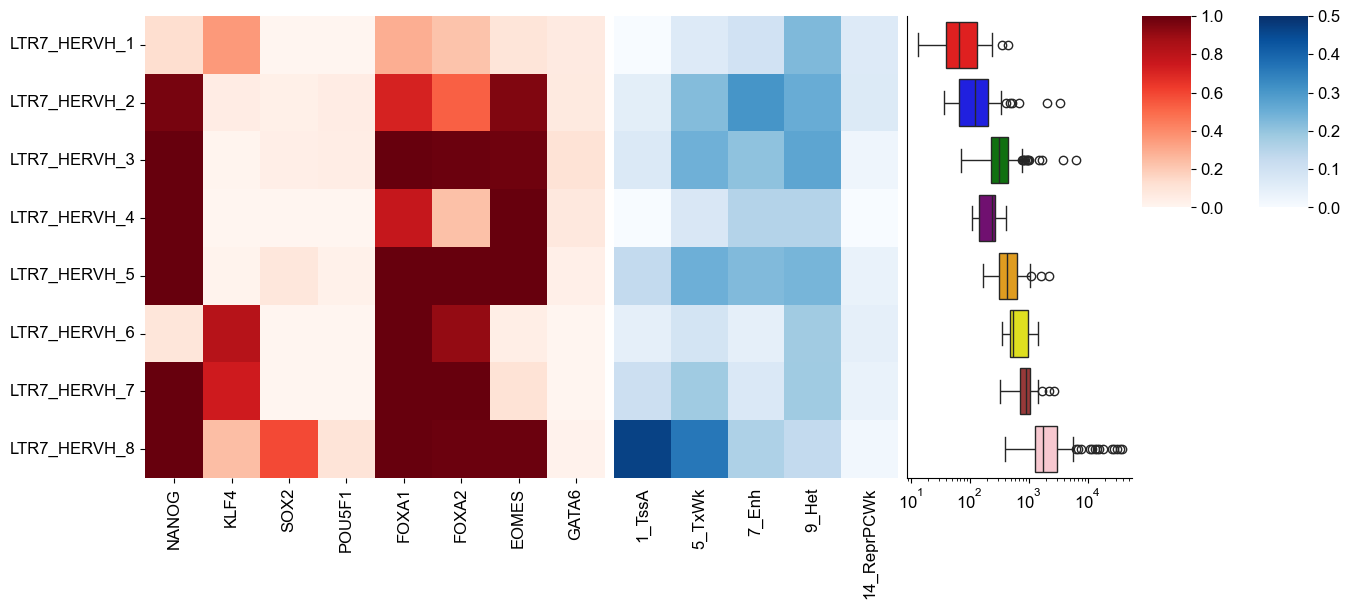

In [8]:
fig = plt.figure(figsize=[15, 6])
gs = GridSpec(7, 20)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

i = 0

# TF
TF_order = ['NANOG', 'KLF4', 'SOX2', 'POU5F1', 'FOXA1', 'FOXA2', 'EOMES', 'GATA6']

ax = plt.subplot(gs[:, :len(TF_order)])
ax_TF_cbar = plt.subplot(gs[:3, 17])
i += len(TF_order)

subfamily_list = ['LTR7_HERVH_5', 'LTR7_HERVH_4', 'LTR7_HERVH_1', 'LTR7_HERVH_7', 'LTR7_HERVH_2', 'LTR7_HERVH_3', 'LTR7_HERVH_6', 'LTR7_HERVH_0']
data = TF_groupby.mean().loc[subfamily_list][TF_order]

#sns.heatmap(data, vmax=1, cmap='Reds', cbar=False, ax=ax, cbar_ax=ax_TF_cbar)
sns.heatmap(data, vmax=1, cmap='Reds', ax=ax, cbar_ax=ax_TF_cbar)

ax.set_xticklabels(labels=TF_order, rotation=90)
ax.set_yticklabels(labels=reorder_dict.values())
ax.set_ylabel('')

# roadmap
xticks_name = ['1_TssA', '5_TxWk', '7_Enh', '9_Het', '14_ReprPCWk']

ax = plt.subplot(gs[:, i:i+len(xticks_name)])
ax_roadmap_cbar = plt.subplot(gs[:3, 19])
i += len(xticks_name)

data = roadmap_groupby.mean().loc[subfamily_list][[1, 5, 7, 9, 14]]

#sns.heatmap(data, cmap='Blues', vmax=0.7, cbar=False, ax=ax, cbar_ax=ax_roadmap_cbar)
sns.heatmap(data, cmap='Blues', vmax=0.5, ax=ax, cbar_ax=ax_roadmap_cbar)

ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_xticklabels(labels=xticks_name, rotation=90)
ax.tick_params(right=False, top=False, left=False, bottom=False)

# expression
ax = plt.subplot(gs[:, i:i+4])
data = primed_ES_cell
x = data['expression']+1
y = data['repeat adjusted subfamily name']
palette = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'brown', 'pink']

sns.boxplot(x=x, y=y, order=subfamily_list, palette=palette, ax=ax)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xscale('log')
ax.set_yticklabels([])
ax.tick_params(right=False, top=False, left=False)
[ax.spines[loc].set_visible(False) for loc in ['top','right']]

plt.rcParams["font.family"] = "Arial"
plt.savefig('../Figure/Supplementary Figure12/Supplementary Figure12A.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure12/Supplementary Figure12A.pdf', bbox_inches='tight', transparent=True, dpi=300)
#plt.tight_layout()

In [9]:
roadmap_groupby.mean().loc[subfamily_list][[1, 5, 7, 9, 14]].max()

1     0.465517
5     0.362069
7     0.305085
9     0.269841
14    0.067797
dtype: float64

# Supplementary Fig.13B

In [10]:
Dfam = Dfam_RM.copy()

# roadmap
roadmap_order = [1, 5, 7, 9, 14]

roadmap_crosstab = pd.crosstab(roadmap['repeat name'], roadmap['15 models'])>=1
roadmap_crosstab = pd.concat([Dfam_RM, roadmap_crosstab.astype('int64')], axis=1).fillna(0)
roadmap_groupby = roadmap_crosstab[['repeat adjusted subfamily name'] + roadmap_order].groupby(by='repeat adjusted subfamily name')

# expression
wild = HERVH_GSE99215_nomalized_counts[['SRR5587546', 'SRR5587547', 'SRR5587548']].mean(axis=1).rename('primed wild')
KO = HERVH_GSE99215_nomalized_counts[['SRR5587549', 'SRR5587550', 'SRR5587551']].mean(axis=1).rename('primed KO')
primed_ES_cell = pd.concat([Dfam_RM, roadmap_crosstab[9], wild, KO], axis=1)
primed_ES_cell.head()

,repeat chr,repeat start,repeat end,repeat name,repeat adjusted name,repeat score,repeat strand,repeat family name,repeat subfamily name,repeat adjusted subfamily name,...,3-LTR chr,3-LTR start,3-LTR end,3-LTR name,repeat best cluster name,repeat adjusted cluster name,branch length,9,primed wild,primed KO
LTR7up1_HERVH_chr8_dup1,chr8,7402290,7408176,LTR7up1_HERVH_chr8_dup1,LTR7_HERVH_0_dup91,3807/5615/1079/18045/929/3860/5085/1574/2541/3874,+,LTR7_HERVH,LTR7up1_HERVH,LTR7_HERVH_0,...,chr8,7407722.0,7408176.0,LTR7up1_chr8_dup3,LTR7_HERVH_0,LTR7_HERVH_0,0.03967,0,860.554934,706.717642
LTR7up1_HERVH_chr6_dup8,chr6,131323296,131329139,LTR7up1_HERVH_chr6_dup8,LTR7_HERVH_0_dup85,3663/5541/16900/993/3462/4922/1495/2367/3694,+,LTR7_HERVH,LTR7up1_HERVH,LTR7_HERVH_0,...,chr6,131328688.0,131329139.0,LTR7up1_chr6_dup30,LTR7_HERVH_0,LTR7_HERVH_0,0.04443,0,1553.809598,3270.691937
LTR7up1_HERVH_chrX_dup12,chrX,125388836,125394560,LTR7up1_HERVH_chrX_dup12,LTR7_HERVH_0_dup116,3810/2515/1565/5206/3667/1058/17984/5385/4006,-,LTR7_HERVH,LTR7up1_HERVH,LTR7_HERVH_0,...,chrX,125388836.0,125389290.0,LTR7up1_chrX_dup28,LTR7_HERVH_0,LTR7_HERVH_0,0.02513,0,5161.603847,5147.754306
LTR7up1_HERVH_chr12_dup4,chr12,79539848,79545627,LTR7up1_HERVH_chr12_dup4,LTR7_HERVH_0_dup23,3962/23172/1036/3873/5257/1510/2591/4064,+,LTR7_HERVH,LTR7up1_HERVH,LTR7_HERVH_0,...,chr12,79545175.0,79545627.0,LTR7up1_chr12_dup16,LTR7_HERVH_0,LTR7_HERVH_0,0.02060,0,1928.101453,2744.723965
LTR7up1_HERVH_chr5_dup5,chr5,153449685,153455430,LTR7up1_HERVH_chr5_dup5,LTR7_HERVH_0_dup77,3739/2440/1460/4971/3611/1007/17302/4939/3716,-,LTR7_HERVH,LTR7up1_HERVH,LTR7_HERVH_0,...,chr5,153449685.0,153450137.0,LTR7up1_chr5_dup29,LTR7_HERVH_0,LTR7_HERVH_0,0.03545,0,2018.729629,1909.568558


In [11]:
roadmap_groupby.mean()

,1,5,7,9,14
repeat adjusted subfamily name,,,,,
LTR7_HERVH_0,0.465517,0.362069,0.163793,0.129310,0.017241
LTR7_HERVH_1,0.071429,0.246032,0.206349,0.269841,0.023810
LTR7_HERVH_2,0.129412,0.247059,0.223529,0.235294,0.035294
LTR7_HERVH_3,0.045455,0.090909,0.045455,0.181818,0.045455
LTR7_HERVH_4,0.050847,0.220339,0.305085,0.254237,0.067797
LTR7_HERVH_5,0.000000,0.064516,0.096774,0.225806,0.064516
LTR7_HERVH_6,0.111111,0.185185,0.074074,0.185185,0.037037
LTR7_HERVH_7,0.000000,0.076923,0.153846,0.153846,0.000000


In [12]:
# Statistical testing
from statsmodels.stats.multitest import fdrcorrection

data = primed_ES_cell
state = 9
p_list = list()
for subfamily in subfamily_list:

    d = data[data['repeat adjusted subfamily name']==subfamily]
    F = d[d[state]==False]['primed wild']
    T = d[d[state]==True]['primed wild']

    try:
        p = mannwhitneyu(F, T)[1]
        print(subfamily, len(d), len(F), len(T), p)
        p_list.append(p)
    
    except:
        pass

print(fdrcorrection(p_list))

LTR7_HERVH_5 31 24 7 0.1266927165036175
LTR7_HERVH_4 59 44 15 0.09298662475154179
LTR7_HERVH_1 126 92 34 0.529149688182476
LTR7_HERVH_7 13 11 2 0.15384615384615385
LTR7_HERVH_2 85 65 20 0.0065368358980205125
LTR7_HERVH_3 22 18 4 0.3420369104579631
LTR7_HERVH_6 27 22 5 0.25717824848259624
LTR7_HERVH_0 116 101 15 0.0035832726412476142
(array([False, False, False, False,  True, False, False,  True]), array([0.24615385, 0.24615385, 0.52914969, 0.24615385, 0.02614734,
       0.39089933, 0.34290433, 0.02614734]))


0.24615384615384617
0.24615384615384617
0.529149688182476
0.24615384615384617
0.02614734359208205
0.3908993262376721
0.3429043313101283
0.02614734359208205


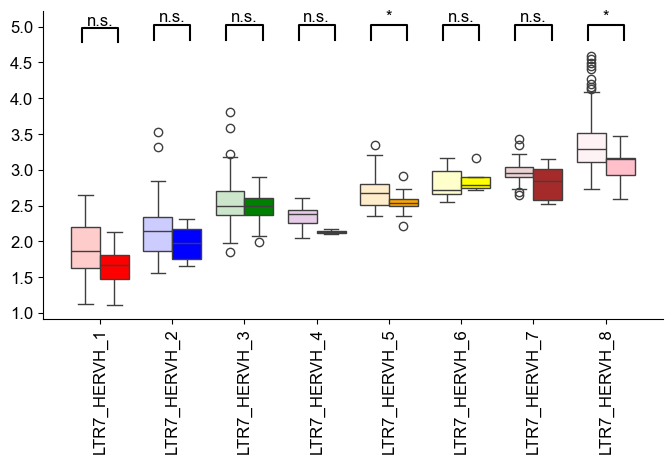

In [13]:
from matplotlib import pyplot as plt
from matplotlib.legend_handler import HandlerTuple
from matplotlib.patches import PathPatch
from matplotlib.colors import to_rgb
import seaborn as sns
import pandas as pd
import numpy as np

fig = plt.figure(figsize=[8, 4])
ax = plt.subplot()
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

data = primed_ES_cell
x = data['repeat adjusted subfamily name']
y = (data['primed wild']+1).apply(np.log10)
#y = (data['primed wild']+1)
hue = data[9]
order = subfamily_list
hue_order = [0, 1]
colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'brown', 'pink']

sns.boxplot(x=x, y=y, hue=hue,
            order=order, hue_order=hue_order, ax=ax)

box_colors = [f + (1 - f) * np.array(to_rgb(c))  # whiten colors depending on hue
              for c in colors for f in reversed(np.linspace(0, 0.8, len(hue_order)))]
              
box_patches = [p for p in ax.patches if isinstance(p, PathPatch)]
#for patch, color in zip(box_patches, box_colors):
#    patch.set_facecolor(color)
              
for i in range(8):
    box_patches[i].set_facecolor(box_colors[i*2])
    box_patches[i+8].set_facecolor(box_colors[i*2+1])

#ax.set_yscale('log')
#ax.set_ylim(0, 5)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticklabels(labels=reorder_dict.values(), rotation=90)
ax.legend().remove()
[ax.spines[loc].set_visible(False) for loc in ['top','right']]

# significance
for i, p in enumerate(fdrcorrection(p_list)[1]):

    print(p)

    if p < 0.05:
        
        barplot_annotate_brackets(0, 1, p, [i-0.25, i+0.25], [4.6, 4.6], maxasterix=3)

    else:
        
        barplot_annotate_brackets(0, 1, p, [i-0.25, i+0.25], [4.6, 4.6], maxasterix=3)

plt.rcParams["font.family"] = "Arial"
plt.savefig('../Figure/Supplementary Figure12/Supplementary Figure12B.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure12/Supplementary Figure12B.pdf', bbox_inches='tight', transparent=True, dpi=300)

#plt.tight_layout()
plt.show()

# Supplementary Fig.13C

In [14]:
TF_order = ['NANOG', 'KLF4', 'SOX2', 'POU5F1', 'FOXA1', 'FOXA2', 'EOMES', 'GATA6']
gene_id = gtf[gtf['gene_name'].isin(TF_order)]
gene_id.index = gene_id['gene_name']
gene_id = gene_id.loc[TF_order]
gene_id

expression = GSE99215_nomalized_counts.loc[gene_id['gene_id version']][GSE99215_nomalized_counts.columns[:6]]
expression.index = TF_order
expression.columns = ['wild'] * 3 + ['KO'] * 3

DEG_TF = GSE99215_DEG.loc[gene_id['gene_id version']]
DEG_TF

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
ENSG00000111704.11,1453.306125,-0.303420,0.275796,-1.100160,0.271262,0.944355,NANOG
ENSG00000136826.15,244.212054,0.643129,0.557616,1.153354,0.248765,0.921339,KLF4
ENSG00000181449.4,1501.613078,-0.157392,0.414004,-0.380171,0.703818,0.999816,SOX2
ENSG00000204531.21,278.674952,0.151874,0.503487,0.301644,0.762924,0.999816,POU5F1
ENSG00000129514.8,38.437031,-1.159137,0.777066,-1.491683,0.135782,0.741169,FOXA1
ENSG00000125798.15,50.005432,-1.302136,0.730980,-1.781358,0.074854,0.564878,FOXA2
ENSG00000163508.13,231.486610,-1.158389,0.564006,-2.053859,0.039989,0.412457,EOMES
ENSG00000141448.11,259.984277,-0.840001,0.639840,-1.312831,0.189240,0.840588,GATA6


0.944354536090981
0.921338720711822
0.999815530555579
0.999815530555579
0.741168803976558
0.564878326616553
0.412457055936801
0.840587945695701


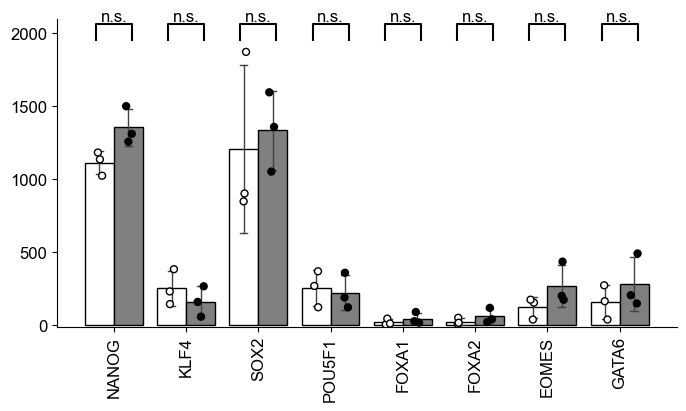

In [15]:
fig = plt.figure(figsize=[8, 4])
ax = plt.subplot()
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

data = expression.reset_index().melt(id_vars='index')
x = data['index']
y = data['value']
hue = data['variable']
order = TF_order

sns.barplot(x=x, y=y, hue=hue, order=order, palette=['white', 'grey'], edgecolor='black', linewidth=1, capsize=.2, errwidth=1, ci='sd', ax=ax)
sns.stripplot(x=x, y=y, hue=hue, order=order, dodge=True, marker='o', palette=['white', 'black'], edgecolor='gray', linewidth=1, size=5, ax=ax)

plt.legend(loc=[1.02, 0])
plt.ylim(-10, 2100)

ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yticks([0, 500, 1000, 1500, 2000])
ax.set_xticklabels(labels=order, rotation=90)
ax.legend().remove()
[ax.spines[loc].set_visible(False) for loc in ['top','right']]


# significance
for i, p in enumerate(DEG_TF['padj']):

    print(p)
    barplot_annotate_brackets(0, 1, p, [i-0.25, i+0.25], [1850, 1850], maxasterix=3)

plt.rcParams["font.family"] = "Arial"
plt.savefig('../Figure/Supplementary Figure12/Supplementary Figure12C.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure12/Supplementary Figure12C.pdf', bbox_inches='tight', transparent=True, dpi=300)

plt.show()


# Supplementary Fig.13D

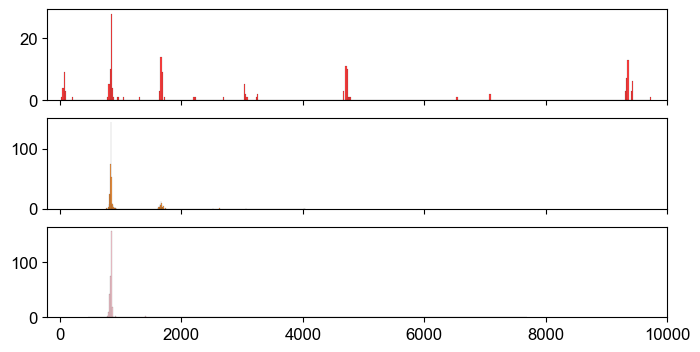

In [16]:
# TRIM28
fig, ax = plt.subplots(3, 1, figsize=[8, 4])
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

subfamilies_list = [['LTR7_HERVH_4', 'LTR7_HERVH_5'], ['LTR7_HERVH_1', 'LTR7_HERVH_7', 'LTR7_HERVH_2'], ['LTR7_HERVH_3', 'LTR7_HERVH_6', 'LTR7_HERVH_0']]
label_list = ['older', 'middle', 'young']
color = ['red', 'tab:orange', 'pink']
params = zip(subfamilies_list, label_list, color)

for i, (subfamilies, label, c) in enumerate(params):
    
    TRIM28 = TRIM28_df[(TRIM28_df['repeat adjusted subfamily name'].isin(subfamilies)) & (TRIM28_df['TRIM28 Cell type']=='hESC H1')]

    sns.histplot(TRIM28['summit position in repeat alignment'].astype('float64'), bins=500, color=c, ax=ax[i])

    ax[i].set_xlim(-200, 10000)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')

    if i != 2:

        ax[i].set_xticklabels('')


plt.rcParams["font.family"] = "Arial"
plt.savefig('../Figure/Supplementary Figure12/Supplementary Figure12D.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure12/Supplementary Figure12D.pdf', bbox_inches='tight', transparent=True, dpi=300)
plt.show()

# Supplementary Fig.13E

In [17]:
Dfam_RM_window = pd.read_csv('../data/overlap/{}.annotation_window_gencode_TSS.bed'.format(family))
Dfam_RM_window

,Unnamed: 0,repeat chr,repeat start,repeat end,repeat name,repeat adjusted name,repeat score,repeat strand,repeat family name,repeat subfamily name,...,score,strand,frame,source,feature,gene_id,gene_id version,gene_type,gene_name,distance
0,0,chr8,7402290,7408176,LTR7up1_HERVH_chr8_dup1,LTR7_HERVH_0_dup91,3807/5615/1079/18045/929/3860/5085/1574/2541/3874,+,LTR7_HERVH,LTR7up1_HERVH,...,.,-,.,HAVANA,gene,ENSG00000215374,ENSG00000215374.6,lncRNA,FAM66B,46931
1,1,chr8,7402290,7408176,LTR7up1_HERVH_chr8_dup1,LTR7_HERVH_0_dup91,3807/5615/1079/18045/929/3860/5085/1574/2541/3874,+,LTR7_HERVH,LTR7up1_HERVH,...,.,-,.,HAVANA,gene,ENSG00000215372,ENSG00000215372.6,protein_coding,ZNF705G,16732
2,2,chr8,7402290,7408176,LTR7up1_HERVH_chr8_dup1,LTR7_HERVH_0_dup91,3807/5615/1079/18045/929/3860/5085/1574/2541/3874,+,LTR7_HERVH,LTR7up1_HERVH,...,.,+,.,HAVANA,gene,ENSG00000215371,ENSG00000215371.3,unprocessed_pseudogene,DEFB108C,29176
3,3,chr8,7402290,7408176,LTR7up1_HERVH_chr8_dup1,LTR7_HERVH_0_dup91,3807/5615/1079/18045/929/3860/5085/1574/2541/3874,+,LTR7_HERVH,LTR7up1_HERVH,...,.,-,.,HAVANA,gene,ENSG00000177257,ENSG00000177257.3,protein_coding,DEFB4B,8687
4,4,chr8,7402290,7408176,LTR7up1_HERVH_chr8_dup1,LTR7_HERVH_0_dup91,3807/5615/1079/18045/929/3860/5085/1574/2541/3874,+,LTR7_HERVH,LTR7up1_HERVH,...,.,+,.,HAVANA,gene,ENSG00000255128,ENSG00000255128.1,processed_pseudogene,HSPD1P3,10815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,908,chrX,153094556,153101476,LTR7C_HERVH_chrX_dup2,LTR7_HERVH_5_dup31,2746/6973/6973/15879/1532/2812,-,LTR7_HERVH,LTR7C_HERVH,...,.,-,.,HAVANA,gene,ENSG00000229979,ENSG00000229979.1,processed_pseudogene,HMGN2P48,42143
909,909,chrX,153094556,153101476,LTR7C_HERVH_chrX_dup2,LTR7_HERVH_5_dup31,2746/6973/6973/15879/1532/2812,-,LTR7_HERVH,LTR7C_HERVH,...,.,+,.,HAVANA,gene,ENSG00000183837,ENSG00000183837.10,protein_coding,PNMA3,38147
910,910,chrX,153094556,153101476,LTR7C_HERVH_chrX_dup2,LTR7_HERVH_5_dup31,2746/6973/6973/15879/1532/2812,-,LTR7_HERVH,LTR7C_HERVH,...,.,+,.,HAVANA,gene,ENSG00000235961,ENSG00000235961.6,protein_coding,PNMA6A,22102
911,911,chrX,153094556,153101476,LTR7C_HERVH_chrX_dup2,LTR7_HERVH_5_dup31,2746/6973/6973/15879/1532/2812,-,LTR7_HERVH,LTR7C_HERVH,...,.,-,.,HAVANA,gene,ENSG00000268883,ENSG00000268883.2,unprocessed_pseudogene,PNMA6B,17588


In [18]:
# add DEG data

DEG_list = list()
for FC, padj in GSE99215_DEG[['log2FoldChange', 'padj']].values:

    if padj < 0.05 and FC > 0:

        D = 'wild'

    elif padj < 0.05 and FC < 0:

        D = 'TRIM28'
    
    else:

        D = 'non-DEG'

    DEG_list.append(D)
  
GSE99215_DEG['DEG'] = DEG_list
GSE99215_DEG_fil = GSE99215_DEG[GSE99215_DEG['padj'].isna()==False]
GSE99215_DEG_dict = GSE99215_DEG.to_dict()

Dfam_RM_window['padj'] = Dfam_RM_window['gene_id version'].apply(lambda x:GSE99215_DEG_dict['padj'][x])
Dfam_RM_window['DEG'] = Dfam_RM_window['gene_id version'].apply(lambda x:GSE99215_DEG_dict['DEG'][x])
Dfam_RM_window_fil = Dfam_RM_window[Dfam_RM_window['padj'].isna()==False]
Dfam_RM_window_fil

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name,DEG
ENSG00000289168.1,2449.763782,-7.011268,0.433220,-16.184076,6.532270e-59,2.034410e-54,ENSG00000289168,TRIM28
ENSG00000241336.2,438.201084,-7.290702,0.524079,-13.911459,5.396730e-44,8.403788e-40,LINC01487,TRIM28
ENSG00000289456.1,442.514804,-7.028237,0.523176,-13.433781,3.833285e-41,3.979461e-37,ENSG00000289456,TRIM28
ENSG00000189229.12,222.238030,6.140471,0.459841,13.353477,1.130463e-40,8.801787e-37,ENSG00000189229,wild
ENSG00000280809.5,2056.254986,-7.296747,0.585725,-12.457622,1.271036e-35,6.597525e-32,LINC00836,TRIM28
...,...,...,...,...,...,...,...,...
ENSG00000287916.1,87.077190,0.000148,0.383497,0.000386,9.996922e-01,9.999918e-01,ENSG00000287916,non-DEG
ENSG00000078699.22,461.713239,0.000035,0.350114,0.000100,9.999199e-01,9.999918e-01,CBFA2T2,non-DEG
ENSG00000288025.1,8.090023,0.000043,1.032253,0.000041,9.999670e-01,9.999918e-01,ENSG00000288025,non-DEG
ENSG00000090266.13,625.319328,-0.000092,0.311063,-0.000295,9.997650e-01,9.999918e-01,NDUFB2,non-DEG


In [20]:
gene_type_list = ['protein_coding', 'lncRNA', 'miRNA']
Dfam_RM_window_position_gene = Dfam_RM_window_fil[Dfam_RM_window_fil['gene_type'].isin(gene_type_list)]

distance_list = [0, 2500, 10000, 50000]
distance_class_list = list()
for distance in Dfam_RM_window_position_gene['distance']:

    check = False
    for i in range(3):

        distance = int(distance)
        start = int(distance_list[i])
        end = int(distance_list[i+1])

        if start <= distance and distance < end and check == False:

            distance_class = '{}-{} bp'.format(start, end)
            distance_class_list.append(distance_class)
            check = True


Dfam_RM_window_position_gene['distance class'] = distance_class_list
Dfam_RM_window_position_gene


,Unnamed: 0,repeat chr,repeat start,repeat end,repeat name,repeat adjusted name,repeat score,repeat strand,repeat family name,repeat subfamily name,...,source,feature,gene_id,gene_id version,gene_type,gene_name,distance,padj,DEG,distance class
0,0,chr8,7402290,7408176,LTR7up1_HERVH_chr8_dup1,LTR7_HERVH_0_dup91,3807/5615/1079/18045/929/3860/5085/1574/2541/3874,+,LTR7_HERVH,LTR7up1_HERVH,...,HAVANA,gene,ENSG00000215374,ENSG00000215374.6,lncRNA,FAM66B,46931,0.999816,non-DEG,10000-50000 bp
1,1,chr8,7402290,7408176,LTR7up1_HERVH_chr8_dup1,LTR7_HERVH_0_dup91,3807/5615/1079/18045/929/3860/5085/1574/2541/3874,+,LTR7_HERVH,LTR7up1_HERVH,...,HAVANA,gene,ENSG00000215372,ENSG00000215372.6,protein_coding,ZNF705G,16732,0.339565,non-DEG,10000-50000 bp
6,6,chr6,131323296,131329139,LTR7up1_HERVH_chr6_dup8,LTR7_HERVH_0_dup85,3663/5541/16900/993/3462/4922/1495/2367/3694,+,LTR7_HERVH,LTR7up1_HERVH,...,HAVANA,gene,ENSG00000289262,ENSG00000289262.1,lncRNA,ENSG00000289262,28879,0.999816,non-DEG,10000-50000 bp
7,7,chr12,79539848,79545627,LTR7up1_HERVH_chr12_dup4,LTR7_HERVH_0_dup23,3962/23172/1036/3873/5257/1510/2591/4064,+,LTR7_HERVH,LTR7up1_HERVH,...,HAVANA,gene,ENSG00000257894,ENSG00000257894.2,lncRNA,ENSG00000257894,36452,0.402668,non-DEG,10000-50000 bp
9,9,chr12,79539848,79545627,LTR7up1_HERVH_chr12_dup4,LTR7_HERVH_0_dup23,3962/23172/1036/3873/5257/1510/2591/4064,+,LTR7_HERVH,LTR7up1_HERVH,...,HAVANA,gene,ENSG00000257474,ENSG00000257474.5,lncRNA,ENSG00000257474,0,0.033669,TRIM28,0-2500 bp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,895,chr7,99723170,99729932,LTR7C_HERVH_chr7_dup1,LTR7_HERVH_5_dup23,2533/2057/4348/6875/2528,+,LTR7_HERVH,LTR7C_HERVH,...,HAVANA,gene,ENSG00000160870,ENSG00000160870.15,protein_coding,CYP3A7,5264,0.999816,non-DEG,2500-10000 bp
904,904,chr2,215089939,215096031,LTR7BC_HERVH_chr2_dup6,LTR7_HERVH_5_dup17,2632/2238/20639/2616/3764/2532,+,LTR7_HERVH,LTR7BC_HERVH,...,HAVANA,gene,ENSG00000144452,ENSG00000144452.15,protein_coding,ABCA12,42595,0.999816,non-DEG,10000-50000 bp
906,906,chr17,55467773,55476510,LTR7u2_HERVH_chr17_dup2,LTR7_HERVH_5_dup13,2264/1858/6255/11790/1103/4028/3012/4286/2674,+,LTR7_HERVH,LTR7u2_HERVH,...,HAVANA,gene,ENSG00000108960,ENSG00000108960.9,protein_coding,MMD,45849,0.999816,non-DEG,10000-50000 bp
909,909,chrX,153094556,153101476,LTR7C_HERVH_chrX_dup2,LTR7_HERVH_5_dup31,2746/6973/6973/15879/1532/2812,-,LTR7_HERVH,LTR7C_HERVH,...,HAVANA,gene,ENSG00000183837,ENSG00000183837.10,protein_coding,PNMA3,38147,0.148421,non-DEG,10000-50000 bp


In [21]:
# count
crosstab =  pd.crosstab(Dfam_RM_window_position_gene['DEG'], Dfam_RM_window_position_gene['distance class'])
crosstab_norm = pd.crosstab(Dfam_RM_window_position_gene['DEG'], Dfam_RM_window_position_gene['distance class'], normalize='index')
crosstab_norm = crosstab_norm[['0-2500 bp', '2500-10000 bp', '10000-50000 bp']]


# Statistical testing
pvalue_list = list()
for distance_class in ['0-2500 bp', '2500-10000 bp', '10000-50000 bp']:

    exp = crosstab_norm[distance_class]['non-DEG']

    for D in ['wild', 'TRIM28']:

        k = crosstab[distance_class].loc[D]
        N = crosstab.loc[D].sum()

        p = binomtest(k=k, n=N, p=exp)
        pvalue_list.append([distance_class, D, p.pvalue])

        print(distance_class, D, p)

pvalue_df = pd.DataFrame(pvalue_list, columns=['distance class', 'DEG', 'pvalue'])
pvalue_df['FDR'] = fdrcorrection(pvalue_df['pvalue'])[1]
pvalue_df

0-2500 bp wild BinomTestResult(k=6, n=18, alternative='two-sided', statistic=0.3333333333333333, pvalue=0.010526465212276863)
0-2500 bp TRIM28 BinomTestResult(k=11, n=37, alternative='two-sided', statistic=0.2972972972972973, pvalue=0.001681797620740307)
2500-10000 bp wild BinomTestResult(k=3, n=18, alternative='two-sided', statistic=0.16666666666666666, pvalue=0.7333301915656207)
2500-10000 bp TRIM28 BinomTestResult(k=3, n=37, alternative='two-sided', statistic=0.08108108108108109, pvalue=0.4755332406214675)
10000-50000 bp wild BinomTestResult(k=9, n=18, alternative='two-sided', statistic=0.5, pvalue=0.0258651718605646)
10000-50000 bp TRIM28 BinomTestResult(k=23, n=37, alternative='two-sided', statistic=0.6216216216216216, pvalue=0.08815249374775938)


,distance class,DEG,pvalue,FDR
0,0-2500 bp,wild,0.010526,0.031579
1,0-2500 bp,TRIM28,0.001682,0.010091
2,2500-10000 bp,wild,0.733330,0.733330
3,2500-10000 bp,TRIM28,0.475533,0.570640
4,10000-50000 bp,wild,0.025865,0.051730
5,10000-50000 bp,TRIM28,0.088152,0.132229


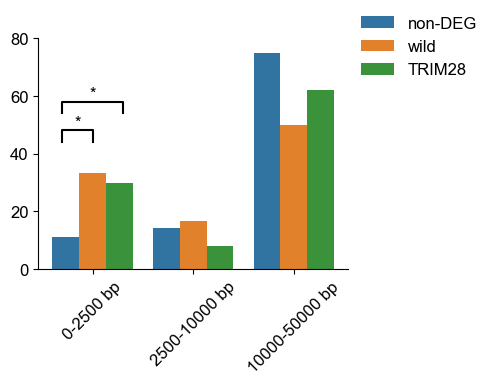

In [22]:
fig = plt.figure(figsize=[4, 3])
ax = plt.subplot()
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

data = crosstab_norm.reset_index().melt(id_vars='DEG')
x = data['distance class']
y = data['value'] * 100
hue = data['DEG']
order = ['0-2500 bp', '2500-10000 bp', '10000-50000 bp']
hue_order = ['non-DEG', 'wild', 'TRIM28']

sns.barplot(x=x, y=y, hue=hue, order=order, hue_order=hue_order)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_ylim(0, 80)
ax.set_xticklabels(order, rotation=45)
[ax.spines[loc].set_visible(False) for loc in ['top','right']]
ax.legend(loc=[1.02, 0.8], frameon=False)

# significance
p = pvalue_df.loc[0]['FDR']
barplot_annotate_brackets(0, 1, p, [-0.3, 0], [10, 40], maxasterix=3)
p = pvalue_df.loc[1]['FDR']
barplot_annotate_brackets(0, 1, p, [-0.3, 0.3], [10, 50], maxasterix=3)

plt.rcParams["font.family"] = "Arial"
plt.savefig('../Figure/Supplementary Figure12/Supplementary Figure12E.png', bbox_inches='tight', dpi=300)
plt.savefig('../Figure/Supplementary Figure12/Supplementary Figure12E.pdf', bbox_inches='tight', transparent=True, dpi=300)
